# Mall Customer Segmentation Data


# About Dataset

Context

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . 

Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# Importing Libraries

In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
data=pd.read_csv('Mall_Customers_seg.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Observation:-

1)To classify / cluster Mall Customers based on numerical and categorical features.
2) It is an Unsupervised Learning problem statement as it have no target variable.
3) # Dataset Attributes
CustomerID : Unique ID assigned to the customer
Gender : Gender of the customer
Age : Age of the customer
Annual Income (k$) : Annual Income of the customer
Spending Score (1-1000) : Score assigned by the mall based on customer behavior and spending nature

# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)
print(data.isna().sum())
#printing the summary of data type
data.info() 

(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#first remove duplicates & recheck the size
data.drop_duplicates(inplace=True)

print(data.shape)

(200, 5)


As we seen there is no null values as well as no duplicates found so lets move further.

# Statistical Summary

In [5]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


# Data Visualization

# Univariate Plots

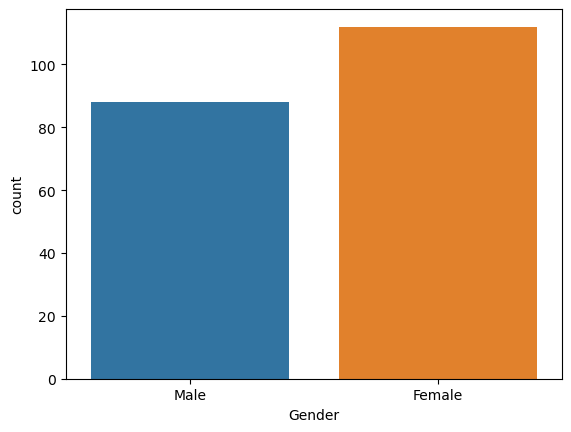

Male       88
Female    112
Name: Gender, dtype: int64


In [6]:
#plot each class frequency
sns.countplot(x='Gender',data=data)
plt.show()
print(data['Gender'].value_counts(ascending=True))

From Graph we can see there are female customers are there.

In [7]:
# as we have Gender is Objective type column lets convert them into intiger
data['Gender']=[0 if x=='Female' else 1 for x in data['Gender']]
data['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

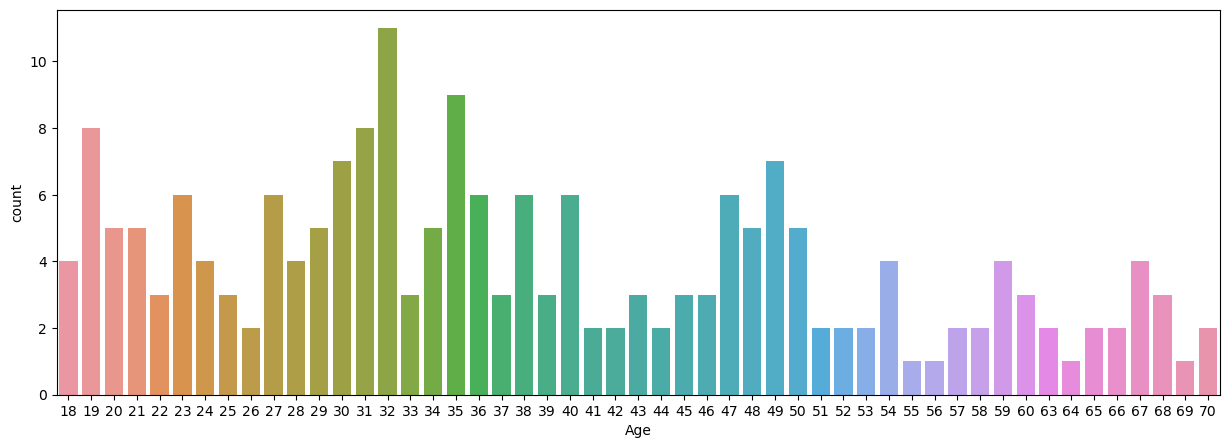

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64


In [8]:
#plot each class frequency
plt.figure(figsize=(15,5))
sns.countplot(x='Age',data=data)
plt.show()
print(data['Age'].value_counts())

From Graph we can see that there are age group from 18 to 70.

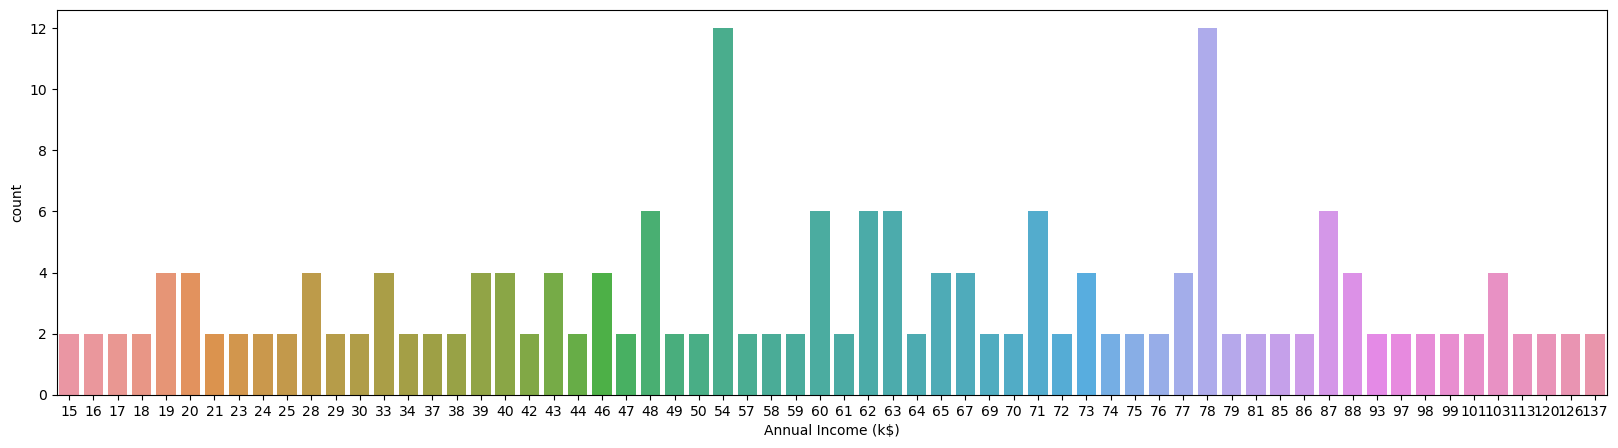

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64


In [9]:
#plot each class frequency
plt.figure(figsize=(20,5))
sns.countplot(x='Annual Income (k$)',data=data)
plt.show()
print(data['Annual Income (k$)'].value_counts())

So from graph we can see the minimum annual income is 10k$ to 137k$.

In [29]:
x=data.drop(columns=['CustomerID','Gender', 'Age'])
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


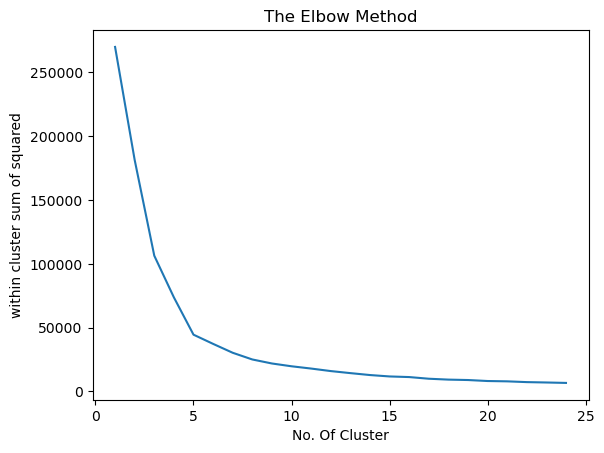

In [30]:
# Elbow Method to find the no of cluster 
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,25):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,25),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. Of Cluster')
plt.ylabel('within cluster sum of squared')# or Inclined distance or inertia
plt.show()

From graph we can see the 6 no has minimum intertia or we can say a stable intertia between 6 to further ie 7,8,9, 10 etc. SO, i am selecting 6 no. of clusters.

In [40]:
#Fitting kmeans to the dataset with selected cluster 
kmeans=KMeans(n_clusters=6, random_state=4,max_iter=3000)
y_kmeans=kmeans.fit_predict(x)
y_kmeans


array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 5, 0, 5, 4, 5, 4, 5,
       0, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

So, lets interpreate the above prediction 1) if gender is 1 age is 19 annual income is 15 and spending score is 39 then they belongs to cluster no.4 and so on.

In [41]:
x.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Model Evaluation 

In [42]:
# Lets check how our clusters are well definded or our model is created well or not in terms of percentage.
from sklearn.metrics import silhouette_score
silhouette_score(x,y_kmeans)

0.5379675585622219

As we have very less dataset just 200 datapoints so the accuracy is low. For better accuracy we need suffient datapoints.

In [44]:
# Lets check if our model is predicted right or not. It predict the cluster no to which data point belongs to 
test= kmeans.predict(np.asarray([[17,40]]))
test[0]

2

In [45]:
# Suppose if you want perticular or this cluster or group save seaperatly or you want to see the no of customers in this group then 
cluster_2_coustomers=x[y_kmeans==4]
print(cluster_2_coustomers)

     Annual Income (k$)  Spending Score (1-100)
124                  70                      29
128                  71                      11
130                  71                       9
134                  73                       5
136                  73                       7
138                  74                      10
140                  75                       5
144                  77                      12
146                  77                      36
148                  78                      22
150                  78                      17
152                  78                      20
154                  78                      16
156                  78                       1
158                  78                       1
160                  79                      35
162                  81                       5
164                  85                      26
166                  86                      20
168                  87                 

So, from above we can clearly see the datapoints related to this cluster no 4. and we can do our further analysis as per your requirement like we can terat them as special customer or send them some discount etc.

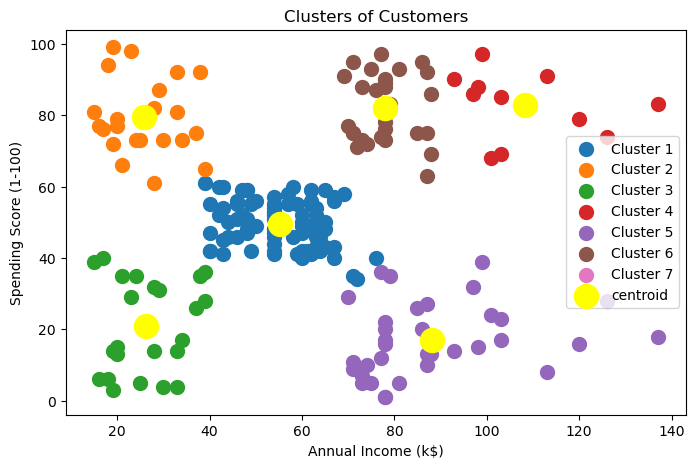

In [47]:
# Visualisation of cluster 
plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans==0]['Annual Income (k$)'],x[y_kmeans==0]['Spending Score (1-100)'],s=100, label='Cluster 1')
plt.scatter(x[y_kmeans==1]['Annual Income (k$)'],x[y_kmeans==1]['Spending Score (1-100)'],s=100,label='Cluster 2')
plt.scatter(x[y_kmeans==2]['Annual Income (k$)'],x[y_kmeans==2]['Spending Score (1-100)'],s=100,label='Cluster 3')
plt.scatter(x[y_kmeans==3]['Annual Income (k$)'],x[y_kmeans==3]['Spending Score (1-100)'],s=100,label='Cluster 4')
plt.scatter(x[y_kmeans==4]['Annual Income (k$)'],x[y_kmeans==4]['Spending Score (1-100)'],s=100,label='Cluster 5')
plt.scatter(x[y_kmeans==5]['Annual Income (k$)'],x[y_kmeans==5]['Spending Score (1-100)'],s=100,label='Cluster 6')
plt.scatter(x[y_kmeans==6]['Annual Income (k$)'],x[y_kmeans==6]['Spending Score (1-100)'],s=100,label='Cluster 7')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, c='yellow',label='centroid')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()
plt.show()

In [48]:
kmeans.cluster_centers_

array([[ 55.2962963 ,  49.51851852],
       [ 25.72727273,  79.36363636],
       [ 26.30434783,  20.91304348],
       [108.18181818,  82.72727273],
       [ 88.2       ,  17.11428571],
       [ 78.03571429,  81.89285714]])